# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the data

In [2]:
df=pd.read_csv('sales_data.csv')

# Data Sampling

In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [5]:
df.tail()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David
999,1086,2023-08-16,Alice,East,4923.93,48,Food,2632.58,2926.68,Returning,0.14,Cash,Online,East-Alice


# Check/Handle Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


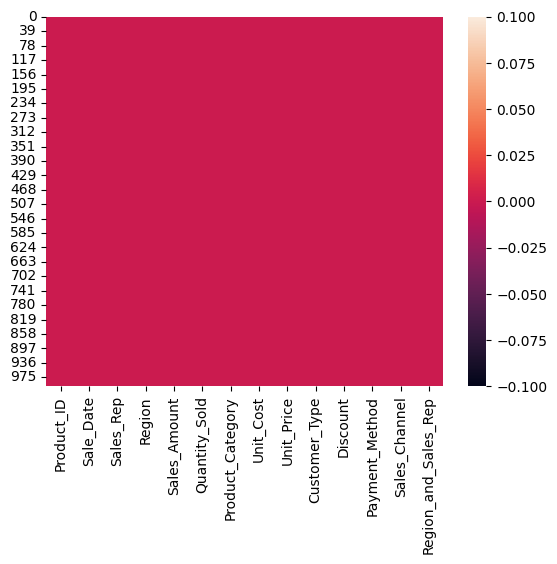

In [7]:
sns.heatmap(df.isna())
plt.show()

# Check/Handle Duplicates

In [8]:
print('Are there any duplicates ?',df.duplicated().any())

Are there any duplicates ? False


# Data Preprocessing

In [9]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [10]:
df.dtypes

Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

####  **Create proper date format**

In [11]:
df['Sale_Date']=pd.to_datetime(df['Sale_Date'])

####  **Create new Sales Column**

In [12]:
df['sales']=df['Unit_Price']*df['Quantity_Sold']

####  **Create new Cost of sales Column**

In [13]:
df['cost_of_sales']=df['Unit_Cost']*df['Quantity_Sold']

####  **Create Gross Margin Column**

In [14]:
df['gross margin']=df['sales']-df['cost_of_sales']

####  **Drop unused columns**

In [15]:
df.drop(axis=1,columns=['Sales_Amount','Discount','Region_and_Sales_Rep'],inplace=True)

####  **Rename columns**

In [16]:
df.columns=['product_ID', 'sale_date', 'sales_rep', 'region', 'quantity_Sold',
       'product_category', 'unit_cost', 'unit_price', 'customer_type',
       'payment_method', 'sales_channel', 'sales', 'cost_of_sales',
       'gross margin']

####  **Create month column**

In [17]:
df['month']=df['sale_date'].dt.month

# Check/Handle Categorical or Ordinal data

In [18]:
df.columns

Index(['product_ID', 'sale_date', 'sales_rep', 'region', 'quantity_Sold',
       'product_category', 'unit_cost', 'unit_price', 'customer_type',
       'payment_method', 'sales_channel', 'sales', 'cost_of_sales',
       'gross margin', 'month'],
      dtype='object')

In [19]:
df['sales_rep'].unique()

array(['Bob', 'David', 'Charlie', 'Eve', 'Alice'], dtype=object)

In [20]:
df['region'].unique()

array(['North', 'West', 'South', 'East'], dtype=object)

In [21]:
df['product_category'].unique()

array(['Furniture', 'Food', 'Clothing', 'Electronics'], dtype=object)

In [22]:
df['customer_type'].unique()

array(['Returning', 'New'], dtype=object)

In [23]:
df['payment_method'].unique()

array(['Cash', 'Bank Transfer', 'Credit Card'], dtype=object)

In [24]:
df['sales_channel'].unique()

array(['Online', 'Retail'], dtype=object)

In [25]:
df.columns

Index(['product_ID', 'sale_date', 'sales_rep', 'region', 'quantity_Sold',
       'product_category', 'unit_cost', 'unit_price', 'customer_type',
       'payment_method', 'sales_channel', 'sales', 'cost_of_sales',
       'gross margin', 'month'],
      dtype='object')

In [26]:
from pathlib import Path  # doctest: +SKIP
filepath = Path(r'C:\Users\User\Downloads\SQL\PROJECTS\salesdata.csv')  # doctest: +SKIP
filepath.parent.mkdir(parents=True, exist_ok=True)  # doctest: +SKIP
df.to_csv(filepath,columns= ['product_ID', 'sale_date', 'sales_rep', 'region', 'quantity_Sold',
       'product_category', 'unit_cost', 'unit_price', 'customer_type',
       'payment_method', 'sales_channel', 'sales', 'cost_of_sales',
       'gross margin'],header= True,
        index = True,)  # doctest: +SKIP

In [27]:
df['product_ID'].nunique()

100

# Data Exploration

### 1. Analysis of Sales,Cost and Gross Margin

In [28]:
print('Total Sales =',round(df['sales'].sum()))

Total Sales = 70329941


In [29]:
print('Total Cogs =',df['cost_of_sales'].sum())

Total Cogs = 63842093.64


In [30]:
print('Gross Profit =',df['gross margin'].sum())

Gross Profit = 6487847.07


In [31]:
print('Gross Profit% =',round(df['gross margin'].sum()/df['sales'].sum(),2))

Gross Profit% = 0.09


###### **MoM change Sales**

In [32]:
df.groupby('month')['sales'].sum()

month
1     7488100.51
2     5627477.45
3     6008259.41
4     5468497.62
5     5800626.51
6     6142561.23
7     4751432.42
8     6716190.61
9     4557015.58
10    6560606.39
11    4958930.19
12    6250242.79
Name: sales, dtype: float64

In [33]:
df.groupby('month')['sales'].sum().shift(1)

month
1            NaN
2     7488100.51
3     5627477.45
4     6008259.41
5     5468497.62
6     5800626.51
7     6142561.23
8     4751432.42
9     6716190.61
10    4557015.58
11    6560606.39
12    4958930.19
Name: sales, dtype: float64

In [34]:
df.groupby('month')['sales'].sum()-df.groupby('month')['sales'].sum().shift(1)

month
1            NaN
2    -1860623.06
3      380781.96
4     -539761.79
5      332128.89
6      341934.72
7    -1391128.81
8     1964758.19
9    -2159175.03
10    2003590.81
11   -1601676.20
12    1291312.60
Name: sales, dtype: float64

In [35]:
round((df.groupby('month')['sales'].sum()-df.groupby('month')['sales'].sum().shift(1))/df.groupby('month')['sales'].sum().shift(1),2)

month
1      NaN
2    -0.25
3     0.07
4    -0.09
5     0.06
6     0.06
7    -0.23
8     0.41
9    -0.32
10    0.44
11   -0.24
12    0.26
Name: sales, dtype: float64

# 2. Sales by categorical data

###### **Rep sales by value**

In [36]:
df.groupby('sales_rep')['sales'].sum().sort_values(ascending=False)

sales_rep
David      16395583.95
Eve        15271749.44
Bob        13712628.18
Alice      13397730.09
Charlie    11552249.05
Name: sales, dtype: float64

###### ***David is the leading sales rep***

In [37]:
df.groupby(['product_category','sales_rep'])['sales'].sum().sort_values(ascending=False)

product_category  sales_rep
Clothing          Eve          4877203.67
Electronics       David        4803663.70
Furniture         David        4410486.87
                  Bob          4363361.78
Clothing          David        3883204.91
Furniture         Eve          3857673.79
Electronics       Eve          3703988.24
Clothing          Charlie      3702554.37
Food              Alice        3438287.91
Clothing          Bob          3423701.61
                  Alice        3400069.37
Electronics       Alice        3330930.43
Food              David        3298228.47
Furniture         Alice        3228442.38
Food              Bob          3148524.98
Electronics       Charlie      2955418.39
Food              Eve          2832883.74
Electronics       Bob          2777039.81
Furniture         Charlie      2470315.74
Food              Charlie      2423960.55
Name: sales, dtype: float64

###### ***Eve is the leading clothing sales rep,in spite of David being the overall leading sales rep***

In [38]:
df.groupby(['region','sales_rep'])['sales'].sum().sort_values(ascending=False)

region  sales_rep
North   David        4850649.65
East    David        4141732.92
South   Eve          4046329.40
North   Eve          3938643.56
West    Bob          3930879.07
        David        3890350.24
East    Alice        3866647.81
        Bob          3708093.27
West    Eve          3673805.20
East    Eve          3612971.28
South   Alice        3537229.80
        David        3512851.14
West    Charlie      3465872.34
North   Bob          3295469.98
        Alice        3193190.68
        Charlie      2930449.98
West    Alice        2800661.80
South   Bob          2778185.86
East    Charlie      2747955.77
South   Charlie      2407970.96
Name: sales, dtype: float64

###### ***David is the leading sales rep in the North and East region whilst Eve is the leader in the South and second in the North to David***

In [39]:
df.groupby(['customer_type','sales_rep'])['sales'].sum().sort_values(ascending=False)

customer_type  sales_rep
New            David        8472173.69
               Eve          8125361.71
Returning      David        7923410.26
               Eve          7146387.73
New            Alice        7130918.96
               Bob          6983746.51
Returning      Bob          6728881.67
               Alice        6266811.13
New            Charlie      5817061.14
Returning      Charlie      5735187.91
Name: sales, dtype: float64

###### ***David is the leading sales rep by customer type and followed by Eve***

In [40]:
df.groupby(['sales_channel','sales_rep'])['sales'].sum().sort_values(ascending=False)

sales_channel  sales_rep
Retail         David        8465371.06
Online         David        7930212.89
Retail         Eve          7866518.18
Online         Eve          7405231.26
               Alice        7368995.67
Retail         Bob          7017574.85
Online         Bob          6695053.33
               Charlie      6340214.05
Retail         Alice        6028734.42
               Charlie      5212035.00
Name: sales, dtype: float64

###### ***David leads both sales channel***

###### **Regional sales by value**

In [41]:
df.groupby('region')['sales'].sum().sort_values(ascending=False)

region
North    18208403.85
East     18077401.05
West     17761568.65
South    16282567.16
Name: sales, dtype: float64

###### ***The North is the leading region by sales***

In [42]:
df.groupby(['product_category','region'])['sales'].sum().sort_values(ascending=False)

product_category  region
Furniture         West      5177884.31
Clothing          North     5154802.46
Furniture         North     4967389.93
Electronics       East      4966020.72
Clothing          East      4954937.56
                  West      4610984.53
                  South     4566009.38
Electronics       West      4480313.39
                  North     4407194.44
Furniture         East      4122323.47
                  South     4062682.85
Food              East      4034119.30
                  South     3936362.91
Electronics       South     3717512.02
Food              North     3679017.02
                  West      3492386.42
Name: sales, dtype: float64

###### ***The West region is the leading region when it comes to furniture sales***

In [81]:
df.groupby(['sales_channel','region'])['sales'].sum().sort_values(ascending=False)

sales_channel  region
Online         North     9759076.35
Retail         East      9652090.47
Online         West      9131628.75
Retail         West      8629939.90
               North     8449327.50
Online         East      8425310.58
               South     8423691.52
Retail         South     7858875.64
Name: sales, dtype: float64

###### ***Online sales dominate the North region***

In [82]:
df.groupby(['customer_type','region'])['sales'].sum().sort_values(ascending=False)

customer_type  region
New            East      10261466.70
               North     10110284.04
Returning      West       9270444.22
               South      8616180.32
New            West       8491124.43
Returning      North      8098119.81
               East       7815934.35
New            South      7666386.84
Name: sales, dtype: float64

###### ***New customers are more dominant in the East followed by the North region. Returning customers are more dominant in the West.***

In [83]:
df.groupby('product_category')['sales'].sum().sort_values(ascending=False)

product_category
Clothing       19286733.93
Furniture      18330280.56
Electronics    17571040.57
Food           15141885.65
Name: sales, dtype: float64

###### ***Clothing is the leader in products.***


In [84]:
df.groupby(['region','product_category'])['sales'].sum().sort_values(ascending=False)

region  product_category
West    Furniture           5177884.31
North   Clothing            5154802.46
        Furniture           4967389.93
East    Electronics         4966020.72
        Clothing            4954937.56
West    Clothing            4610984.53
South   Clothing            4566009.38
West    Electronics         4480313.39
North   Electronics         4407194.44
East    Furniture           4122323.47
South   Furniture           4062682.85
East    Food                4034119.30
South   Food                3936362.91
        Electronics         3717512.02
North   Food                3679017.02
West    Food                3492386.42
Name: sales, dtype: float64

###### ***The West region is dominant with Furniture sales and the North with Clothing***

In [85]:
df.groupby(['sales_channel','product_category'])['sales'].sum().sort_values(ascending=False)

sales_channel  product_category
Retail         Clothing            10894211.24
Online         Electronics         10023463.56
               Furniture            9735027.83
Retail         Furniture            8595252.73
Online         Clothing             8392522.69
               Food                 7588693.12
Retail         Food                 7553192.53
               Electronics          7547577.01
Name: sales, dtype: float64

###### ***Retail dominantes with Clothing,whilst online is dominant in electronics even though electronics is the third overall in terms of sales.***

In [86]:
df.groupby(['sales_rep','product_category'])['sales'].sum().sort_values(ascending=False)

sales_rep  product_category
Eve        Clothing            4877203.67
David      Electronics         4803663.70
           Furniture           4410486.87
Bob        Furniture           4363361.78
David      Clothing            3883204.91
Eve        Furniture           3857673.79
           Electronics         3703988.24
Charlie    Clothing            3702554.37
Alice      Food                3438287.91
Bob        Clothing            3423701.61
Alice      Clothing            3400069.37
           Electronics         3330930.43
David      Food                3298228.47
Alice      Furniture           3228442.38
Bob        Food                3148524.98
Charlie    Electronics         2955418.39
Eve        Food                2832883.74
Bob        Electronics         2777039.81
Charlie    Furniture           2470315.74
           Food                2423960.55
Name: sales, dtype: float64

###### ***Eve is the leader when it comes to the clothing category and second only to David overall. David is the leader in the Electronics and Furniture categories***

In [87]:
df.groupby(['customer_type','product_category'])['sales'].sum().sort_values(ascending=False)

customer_type  product_category
New            Clothing            10749138.80
Returning      Furniture           10336014.35
New            Electronics          9574541.69
Returning      Clothing             8537595.13
New            Food                 8211315.31
Returning      Electronics          7996498.88
New            Furniture            7994266.21
Returning      Food                 6930570.34
Name: sales, dtype: float64

###### ***New Customers are dominant in all categories***

###### **Channel sales by value**

In [44]:
df.groupby('sales_channel')['sales'].sum().sort_values(ascending=False)

sales_channel
Online    35739707.20
Retail    34590233.51
Name: sales, dtype: float64

###### ***Online is channel which customers opt for.***

In [45]:
df.groupby(['region','sales_channel'])['sales'].sum().sort_values(ascending=False)

region  sales_channel
North   Online           9759076.35
East    Retail           9652090.47
West    Online           9131628.75
        Retail           8629939.90
North   Retail           8449327.50
East    Online           8425310.58
South   Online           8423691.52
        Retail           7858875.64
Name: sales, dtype: float64

###### ***North region is dominant in online sale,when the East is more dominant in retail***

In [46]:
df.groupby(['product_category','sales_channel'])['sales'].sum().sort_values(ascending=False)

product_category  sales_channel
Clothing          Retail           10894211.24
Electronics       Online           10023463.56
Furniture         Online            9735027.83
                  Retail            8595252.73
Clothing          Online            8392522.69
Food              Online            7588693.12
                  Retail            7553192.53
Electronics       Retail            7547577.01
Name: sales, dtype: float64

###### ***Clothing is more dominant in retail than other products whilst electronics are more dominant online.***

In [47]:
df.groupby(['sales_rep','sales_channel'])['sales'].sum().sort_values(ascending=False)

sales_rep  sales_channel
David      Retail           8465371.06
           Online           7930212.89
Eve        Retail           7866518.18
           Online           7405231.26
Alice      Online           7368995.67
Bob        Retail           7017574.85
           Online           6695053.33
Charlie    Online           6340214.05
Alice      Retail           6028734.42
Charlie    Retail           5212035.00
Name: sales, dtype: float64

###### ***David is more dominant in Retail than online and Eve as well is more dominant in Retail.***

###### **Customer Type Sales by value**

In [89]:
df.groupby('customer_type')['sales'].sum().sort_values(ascending=False)

customer_type
New          36529262.01
Returning    33800678.70
Name: sales, dtype: float64

In [51]:
df.groupby(['region','customer_type'])['sales'].sum().sort_values(ascending=False)

region  customer_type
East    New              10261466.70
North   New              10110284.04
West    Returning         9270444.22
South   Returning         8616180.32
West    New               8491124.43
North   Returning         8098119.81
East    Returning         7815934.35
South   New               7666386.84
Name: sales, dtype: float64

###### ***East is dominant when it comes to new customers whilst it is the lowest when it comes to customer retention/repeat. The South is the lowest when it comes to New customers,but is third when it comes to customer retention/repeat customers***

In [90]:
df.groupby(['product_category','customer_type'])['sales'].sum().sort_values(ascending=False)

product_category  customer_type
Clothing          New              10749138.80
Furniture         Returning        10336014.35
Electronics       New               9574541.69
Clothing          Returning         8537595.13
Food              New               8211315.31
Electronics       Returning         7996498.88
Furniture         New               7994266.21
Food              Returning         6930570.34
Name: sales, dtype: float64

###### ***New Customers purchase more clothing than repeat customers who purchase more furniture than electronics.***

In [53]:
df.groupby(['sales_rep','customer_type'])['sales'].sum().sort_values(ascending=False)

sales_rep  customer_type
David      New              8472173.69
Eve        New              8125361.71
David      Returning        7923410.26
Eve        Returning        7146387.73
Alice      New              7130918.96
Bob        New              6983746.51
           Returning        6728881.67
Alice      Returning        6266811.13
Charlie    New              5817061.14
           Returning        5735187.91
Name: sales, dtype: float64

###### ***David and Eve the top 2 overall reps,their sales are more with New customers,the same two persons are also overall dominant with repeat customers.***

In [92]:
df.groupby(['payment_method','customer_type'])['sales'].sum().sort_values(ascending=False)

payment_method  customer_type
Bank Transfer   New              13466253.11
Credit Card     Returning        12283715.80
Cash            New              11801369.98
Credit Card     New              11261638.92
Bank Transfer   Returning        11127821.39
Cash            Returning        10389141.51
Name: sales, dtype: float64

###### ***New Customers dominate each payment method.***

###### **Sales by payment method.**

In [99]:
df.groupby('payment_method')['sales'].sum().sort_values(ascending=False)

payment_method
Bank Transfer    24594074.50
Credit Card      23545354.72
Cash             22190511.49
Name: sales, dtype: float64

###### ***Bank transfers are the leading payment method.***

In [98]:
df.groupby(['region','payment_method'])['quantity_Sold'].sum().sort_values(ascending=False)

region  payment_method
North   Credit Card       2535
West    Bank Transfer     2425
South   Bank Transfer     2325
North   Cash              2270
East    Credit Card       2250
West    Cash              2157
East    Cash              2060
        Bank Transfer     2046
West    Credit Card       1904
North   Bank Transfer     1900
South   Credit Card       1752
        Cash              1731
Name: quantity_Sold, dtype: int64

###### ***Regionally more purchases are made by credit cards.Cash is also the second highest in the North,however bank transfers are 3rd lowest. Considering that this is the leading region by sales,this could mean customers in the North are either more affluent or have a greater capacity to access debt facilities.***

In [97]:
df.groupby(['customer_type','payment_method'])['sales'].sum().sort_values(ascending=False)

customer_type  payment_method
New            Bank Transfer     13466253.11
Returning      Credit Card       12283715.80
New            Cash              11801369.98
               Credit Card       11261638.92
Returning      Bank Transfer     11127821.39
               Cash              10389141.51
Name: sales, dtype: float64

###### ***New customers pay via bank transfer,whilst returning customers use credit cards far more for their purchases.***

In [96]:
df.groupby(['product_category','payment_method'])['sales'].sum().sort_values(ascending=False)

product_category  payment_method
Electronics       Credit Card       6988480.94
Clothing          Bank Transfer     6796536.49
                  Credit Card       6745977.05
Furniture         Bank Transfer     6713805.29
                  Cash              6315840.72
Clothing          Cash              5744220.39
Food              Bank Transfer     5594860.40
Electronics       Bank Transfer     5488872.32
Furniture         Credit Card       5300634.55
Electronics       Cash              5093687.31
Food              Cash              5036763.07
                  Credit Card       4510262.18
Name: sales, dtype: float64

###### ***Credit cards are the leading payment method  and especially for electronics products.Bank transfers overall are the preferred method of payment in all categories.***

### 3. Analysis of Quantities Sold

###### **Product Quantities Sold.**

In [58]:
df.groupby('product_category')['quantity_Sold'].sum().sort_values(ascending=False)

product_category
Clothing       6922
Furniture      6729
Electronics    6096
Food           5608
Name: quantity_Sold, dtype: int64

###### ***Clothing is the leading category.***

In [59]:
df.groupby(['region','product_category'])['quantity_Sold'].sum().sort_values(ascending=False)

region  product_category
North   Clothing            1939
        Furniture           1927
West    Furniture           1889
East    Clothing            1797
West    Clothing            1669
North   Electronics         1660
East    Electronics         1623
South   Food                1577
West    Electronics         1539
South   Clothing            1517
East    Furniture           1473
        Food                1463
South   Furniture           1440
West    Food                1389
South   Electronics         1274
North   Food                1179
Name: quantity_Sold, dtype: int64

###### ***The North region is the leading region by quantities sold for clothing and furniture.***

In [61]:
df.groupby(['sales_channel','product_category'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_channel  product_category
Retail         Clothing            3825
Online         Furniture           3457
               Electronics         3359
Retail         Furniture           3272
Online         Clothing            3097
Retail         Food                2919
               Electronics         2737
Online         Food                2689
Name: quantity_Sold, dtype: int64

###### ***Retail sells far more clothing than online,whilst online sells more furniture than retail.***

In [62]:
df.groupby(['payment_method','product_category'])['quantity_Sold'].sum().sort_values(ascending=False)

payment_method  product_category
Bank Transfer   Clothing            2502
Credit Card     Electronics         2396
Bank Transfer   Furniture           2381
Cash            Furniture           2362
Credit Card     Clothing            2285
Cash            Clothing            2135
Credit Card     Furniture           1986
Cash            Food                1984
Bank Transfer   Electronics         1963
                Food                1850
Credit Card     Food                1774
Cash            Electronics         1737
Name: quantity_Sold, dtype: int64

###### ***Bank transfers are used far more often for clothing, whilst the credit card is used for electronics.***

In [101]:
df.groupby(['sales_rep','product_category'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_rep  product_category
David      Furniture           1663
           Clothing            1615
Bob        Furniture           1567
Eve        Clothing            1552
David      Electronics         1511
Eve        Furniture           1394
           Electronics         1348
Alice      Clothing            1290
Charlie    Clothing            1278
Bob        Food                1275
Alice      Electronics         1255
David      Food                1253
Bob        Clothing            1187
Alice      Food                1165
           Furniture           1122
Charlie    Electronics         1034
Eve        Food                 993
Charlie    Furniture            983
Bob        Electronics          948
Charlie    Food                 922
Name: quantity_Sold, dtype: int64

###### ***David sells more quantities of Clothing than Even,recall that Eve is second overall to David and Eve is superior in clothing sales by value over David.***

###### **Quantities Sold by Sales Rep**

In [63]:
df.groupby(['sales_rep'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_rep
David      6042
Eve        5287
Bob        4977
Alice      4832
Charlie    4217
Name: quantity_Sold, dtype: int64

###### ***David is leading sales rep by value and quantities.***

In [64]:
df.groupby(['region','sales_rep'])['quantity_Sold'].sum().sort_values(ascending=False)

region  sales_rep
North   David        1630
West    Bob          1545
North   Eve          1527
South   David        1499
West    David        1459
East    David        1454
        Alice        1318
        Bob          1317
        Eve          1273
South   Eve          1263
West    Eve          1224
North   Alice        1221
South   Alice        1212
North   Charlie      1184
West    Charlie      1177
North   Bob          1143
West    Alice        1081
East    Charlie       994
South   Bob           972
        Charlie       862
Name: quantity_Sold, dtype: int64

###### ***Regionally David is top and Bob from the west region is second by quantities sold and Eve is third regionally.***

In [65]:
df.groupby(['product_category','sales_rep'])['quantity_Sold'].sum().sort_values(ascending=False)

product_category  sales_rep
Furniture         David        1663
Clothing          David        1615
Furniture         Bob          1567
Clothing          Eve          1552
Electronics       David        1511
Furniture         Eve          1394
Electronics       Eve          1348
Clothing          Alice        1290
                  Charlie      1278
Food              Bob          1275
Electronics       Alice        1255
Food              David        1253
Clothing          Bob          1187
Food              Alice        1165
Furniture         Alice        1122
Electronics       Charlie      1034
Food              Eve           993
Furniture         Charlie       983
Electronics       Bob           948
Food              Charlie       922
Name: quantity_Sold, dtype: int64

###### ***Furniture is the most sold category by David and Bob who is second regionally.***

In [66]:
df.groupby(['sales_channel','sales_rep'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_channel  sales_rep
Retail         David        3199
Online         David        2843
Retail         Eve          2776
Online         Alice        2582
               Eve          2511
               Bob          2509
Retail         Bob          2468
               Alice        2250
Online         Charlie      2157
Retail         Charlie      2060
Name: quantity_Sold, dtype: int64

###### ***David leads both Retail and Online channels.***

###### **Quantities Sold by Customer Type.**

In [67]:
df.groupby(['customer_type'])['quantity_Sold'].sum().sort_values(ascending=False)

customer_type
New          13184
Returning    12171
Name: quantity_Sold, dtype: int64

In [68]:
df.groupby(['region','customer_type'])['quantity_Sold'].sum().sort_values(ascending=False)

region  customer_type
North   New              3880
East    New              3377
West    New              3269
        Returning        3217
South   Returning        3150
East    Returning        2979
North   Returning        2825
South   New              2658
Name: quantity_Sold, dtype: int64

###### ***North,East,West regions are dominated by New Customers. Whereas the West,South,East are dominant in customer retention/repeat.***

In [69]:
df.groupby(['product_category','customer_type'])['quantity_Sold'].sum().sort_values(ascending=False)

product_category  customer_type
Clothing          New              3895
Furniture         Returning        3759
Electronics       New              3417
Clothing          Returning        3027
Furniture         New              2970
Food              New              2902
                  Returning        2706
Electronics       Returning        2679
Name: quantity_Sold, dtype: int64

###### ***Clothing and Electronics are most purchased by new customers. Whereas furniture is mostly purchased by returning customers.***

In [70]:
df.groupby(['sales_channel','customer_type'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_channel  customer_type
Online         New              6788
Retail         New              6396
               Returning        6357
Online         Returning        5814
Name: quantity_Sold, dtype: int64

###### ***New Customers dominate both channels.***

In [71]:
df.groupby('region')['quantity_Sold'].sum().sort_values(ascending=False)

region
North    6705
West     6486
East     6356
South    5808
Name: quantity_Sold, dtype: int64

###### ***The North region is the leading seller by quantities and sales value.***

In [73]:
df.groupby(['product_category','region'])['quantity_Sold'].sum().sort_values(ascending=False)

product_category  region
Clothing          North     1939
Furniture         North     1927
                  West      1889
Clothing          East      1797
                  West      1669
Electronics       North     1660
                  East      1623
Food              South     1577
Electronics       West      1539
Clothing          South     1517
Furniture         East      1473
Food              East      1463
Furniture         South     1440
Food              West      1389
Electronics       South     1274
Food              North     1179
Name: quantity_Sold, dtype: int64

###### ***Clothing and furniture are leading in the North and Furniture in the west.***

In [74]:
df.groupby(['sales_rep','region'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_rep  region
David      North     1630
Bob        West      1545
Eve        North     1527
David      South     1499
           West      1459
           East      1454
Alice      East      1318
Bob        East      1317
Eve        East      1273
           South     1263
           West      1224
Alice      North     1221
           South     1212
Charlie    North     1184
           West      1177
Bob        North     1143
Alice      West      1081
Charlie    East       994
Bob        South      972
Charlie    South      862
Name: quantity_Sold, dtype: int64

###### ***David is the leading seller followed by Bob regionally.***

In [75]:
df.groupby(['sales_channel','region'])['quantity_Sold'].sum().sort_values(ascending=False)

sales_channel  region
Retail         East      3503
Online         North     3413
               West      3373
Retail         North     3292
               West      3113
Online         South     2963
               East      2853
Retail         South     2845
Name: quantity_Sold, dtype: int64

###### ***Retail in the East sells far more quantities than the North who are dominant in online sales and the west is second in terms of online sales.***

In [76]:
df.groupby(['customer_type','region'])['quantity_Sold'].sum().sort_values(ascending=False)

customer_type  region
New            North     3880
               East      3377
               West      3269
Returning      West      3217
               South     3150
               East      2979
               North     2825
New            South     2658
Name: quantity_Sold, dtype: int64

###### ***The North sells far more quantities to new customers whilst the East is second regionally. Whereas the West is leading by customer retention/repeat and the North is second lowest.***